In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, r2_score
from sklearn import preprocessing

In [2]:
# Create your df here:
df = pd.read_csv("profiles.csv")

### at least two graphs containing exploration of the dataset

what is the relationship between age and income?

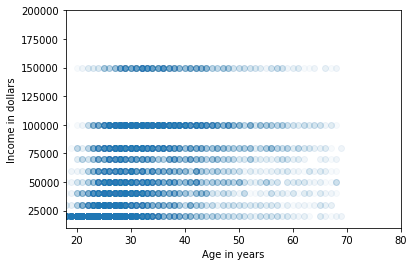

In [3]:
plt.scatter(df.age,df.income, alpha=0.03)
plt.xlim(18,80)
plt.ylim(10000,200000)
plt.xlabel("Age in years")
plt.ylabel("Income in dollars")
plt.show()

Text(0,0.5,'Count of Responses')

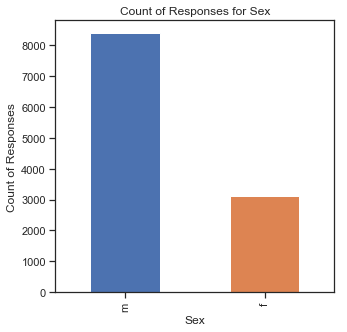

In [118]:
df.sex.value_counts()

ax = df['sex'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Count of Responses for Sex")
ax.set_xlabel("Sex")
ax.set_ylabel("Count of Responses")

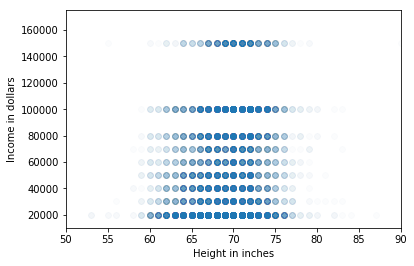

In [4]:
plt.scatter(df.height,df.income, alpha=0.015)
plt.xlim(50,90)
plt.ylim(10000,175000)
plt.xlabel("Height in inches")
plt.ylabel("Income in dollars")
plt.show()

In [5]:
#what are the values in drinks
x = df.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

Text(0,0.5,'Count of Responses')

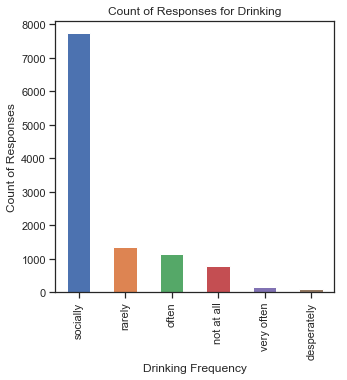

In [117]:
ax = df['drinks'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Count of Responses for Drinking")
ax.set_xlabel("Drinking Frequency")
ax.set_ylabel("Count of Responses")

In [6]:
#what are the values in education
df.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

### a statement of your question (or questions!) and how you arrived there 

How well can we predict sex using various features (age, height, income, education)
How well can we predict a persons drinks_score using various features (age, height, income, education)?

In [7]:
#code for sex
df.loc[:,'sex_code'] = df.sex.map({"m": 1, "f": 0})
print(df.sex_code.value_counts())


1    35829
0    24117
Name: sex_code, dtype: int64


### the explanation of at least two new columns you created and how you did it

In [8]:
#map education to education years - estimated the number of education years for each value in the education column
df.loc[:,'education_years'] = df.education.map({"graduated from college/university": 8, "graduated from masters program": 10, "working on college/university": 6, "working on masters program": 9, "graduated from two-year college": 6, "graduated from high school": 4, "graduated from ph.d program": 12, "graduated from law school": 11, "working on two-year college": 5, "dropped out of college/university": 6, "working on ph.d program": 11, "college/university": 8, "graduated from med school": 12, "working on law school": 9, "two-year college": 6, "working on med school": 10, "dropped out of two-year college": 5, "dropped out of masters program": 9, "masters program": 10, "dropped out of ph.d program": 11, "dropped out of high school": 2, "high school": 4, "working on high school": 2, "ph.d program": 12, "law school": 11, "dropped out of law school": 10, "dropped out of med school": 11, "med school": 12})
print(df.education_years.value_counts())

8.0     24760
10.0     9327
6.0      8460
11.0     2263
9.0      2092
12.0     1755
4.0      1524
5.0      1265
2.0       189
Name: education_years, dtype: int64


In [9]:
#map drinks to drinks_score - turns the responses to drinks column into a numerical value
df.loc[:,'drinks_score'] = df.drinks.map({"not at all": 0, "rarely": 1, "socially": 2,  "often": 3,  "very often": 4, "desperately": 5})
print(df.drinks_score.head())
print(df.drinks.head())

0    2.0
1    3.0
2    2.0
3    2.0
4    2.0
Name: drinks_score, dtype: float64
0    socially
1       often
2    socially
3    socially
4    socially
Name: drinks, dtype: object


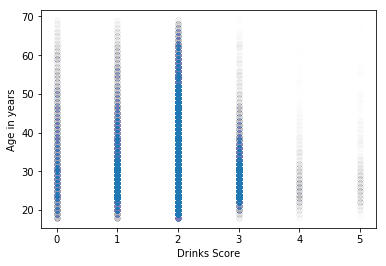

In [10]:
plt.scatter(df.drinks_score, df.age, alpha=0.002)
plt.xlabel("Drinks Score")
plt.ylabel("Age in years")
plt.show()

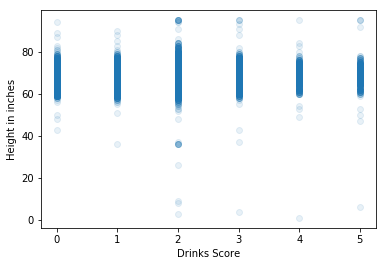

In [11]:
#plot drinks code vs height
plt.scatter(df.drinks_score, df.height, alpha=0.1)
plt.xlabel("Drinks Score")
plt.ylabel("Height in inches")
plt.show()

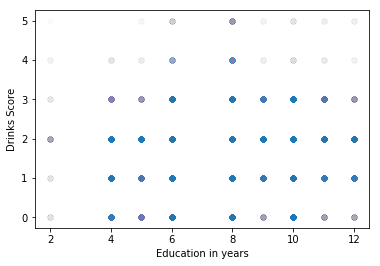

In [12]:
plt.scatter(df.education_years, df.drinks_score, alpha=0.005)
plt.xlabel("Education in years")
plt.ylabel("Drinks Score")
plt.show()

### the comparison between two classification approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall

In [137]:
df = df[df['income'] > 0] 

df_abrev = df[['age','height','income','education_years','drinks_score', 'sex_code']]
df_abrev = df_abrev.dropna()
x = df_abrev[['age','height','income','education_years','drinks_score']] #KNN 90.74, 38.9
#x = df_abrev[['age','height','education_years','drinks_score']] #KNN 90.2, NB 82.5
#x = df_abrev[['age','income','education_years','drinks_score']] #KNN 80.9, NB 44.4
#x = df_abrev[['height','income','education_years','drinks_score']] #KNN 89.7, NB 41.4
#x = df_abrev[['age','height','income','education_years']] #KNN 90.3, NB 39.3
#x = df_abrev[['age','height','income', 'drinks_score']] #KNN 89.97, NB 39.5
#x = df_abrev[['height','education_years','income']] #KNN 89.84, NB 41.3
#x = df_abrev[['income', 'education_years']] #KNN 81.8, NB 70.5
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=x.columns)

y = df_abrev.sex_code

x_train, x_test, y_train, y_test = train_test_split(feature_data, y, train_size = 0.8, test_size = 0.2, random_state=4)


/Users/michaelctodd/miniconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8196155741744702
0.8803921568627451


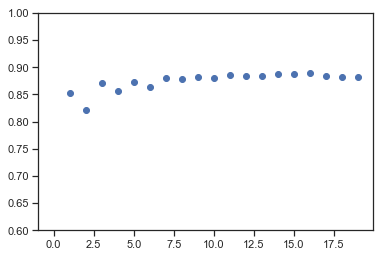

In [138]:
#KNN approach to classify sex using age, height, income, education_years, drinks score
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

print(accuracy_score(classifier.predict(x_test), y_test))
print(f1_score(classifier.predict(x_test), y_test))

accuracy = [0 for i in range(20)]
f1 = [0 for i in range(20)]
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)

    accuracy[i] = accuracy_score(classifier.predict(x_test), y_test)
    f1[i] = f1_score(classifier.predict(x_test), y_test)

plt.scatter(range(20),f1)
plt.ylim(0.6,1)
plt.show()
    

In [139]:
from sklearn.naive_bayes import MultinomialNB

sex_classifier = MultinomialNB()
sex_classifier.fit(x_train, y_train)

print(accuracy_score(sex_classifier.predict(x_test), y_test))
print(f1_score(sex_classifier.predict(x_test),y_test))
#sex_classifier.predict_proba(x_test)
#not as good of a predictor and it is more sensative to the mix of features in the training data
#also the model through an error because there was a negative value in the income field, which ended up being useful to resolve for both models. It improved the score by about 0.05 for the KNN model.

0.7180877279448004
0.8359150889271371


### the comparison between two regression approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall

        age    height  sex_code  education_years  drinks_score
0  0.098039  0.744681       1.0              0.4           0.4
1  0.196078  0.755319       1.0              0.6           0.4
2  0.235294  0.691489       0.0              0.2           0.4
3  0.215686  0.648936       0.0              0.4           0.4
4  0.431373  0.744681       1.0              0.6           0.4
32834288912.363235
0.004581099944161449


/Users/michaelctodd/miniconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


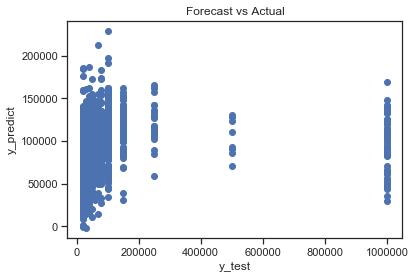

In [106]:
#Can I predict income with age, height, sex, education, and drinks_score?
df_mlr = df[['age','height','income','education_years','drinks_score', 'sex_code']]
df_mlr = df_mlr.dropna()

x = df_mlr[['age','height','sex_code','education_years','drinks_score']]
#x = df_mlr[['age','height','education_years','drinks_score']] 
#x = df_mlr[['age','sex_code','education_years','drinks_score']]
#x = df_mlr[['height','sex_code','education_years','drinks_score']] 
#x = df_mlr[['age','height','sex_code','education_years']] 
#x = df_mlr[['age','height','sex_code', 'drinks_score']]
#x = df_mlr[['height','education_years','sex_code']] 
#x = df_mlr[[ 'education_years']] 

y = df_mlr.income

#normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=x.columns)

# make training and testing sets
x_train, x_test, y_train, y_test = train_test_split(feature_data, y, train_size = 0.8, test_size = 0.2, random_state=3)

#create mlr model
mlr = LinearRegression()
mlr.fit(x_train, y_train)

print(mean_squared_error(mlr.predict(x_test),y_test))
print(mlr.score(x_test, y_test))

plt.scatter(y_test, y_predict)

plt.xlabel("y_test")
plt.ylabel('y_predict')
plt.title("Forecast vs Actual")
plt.show()




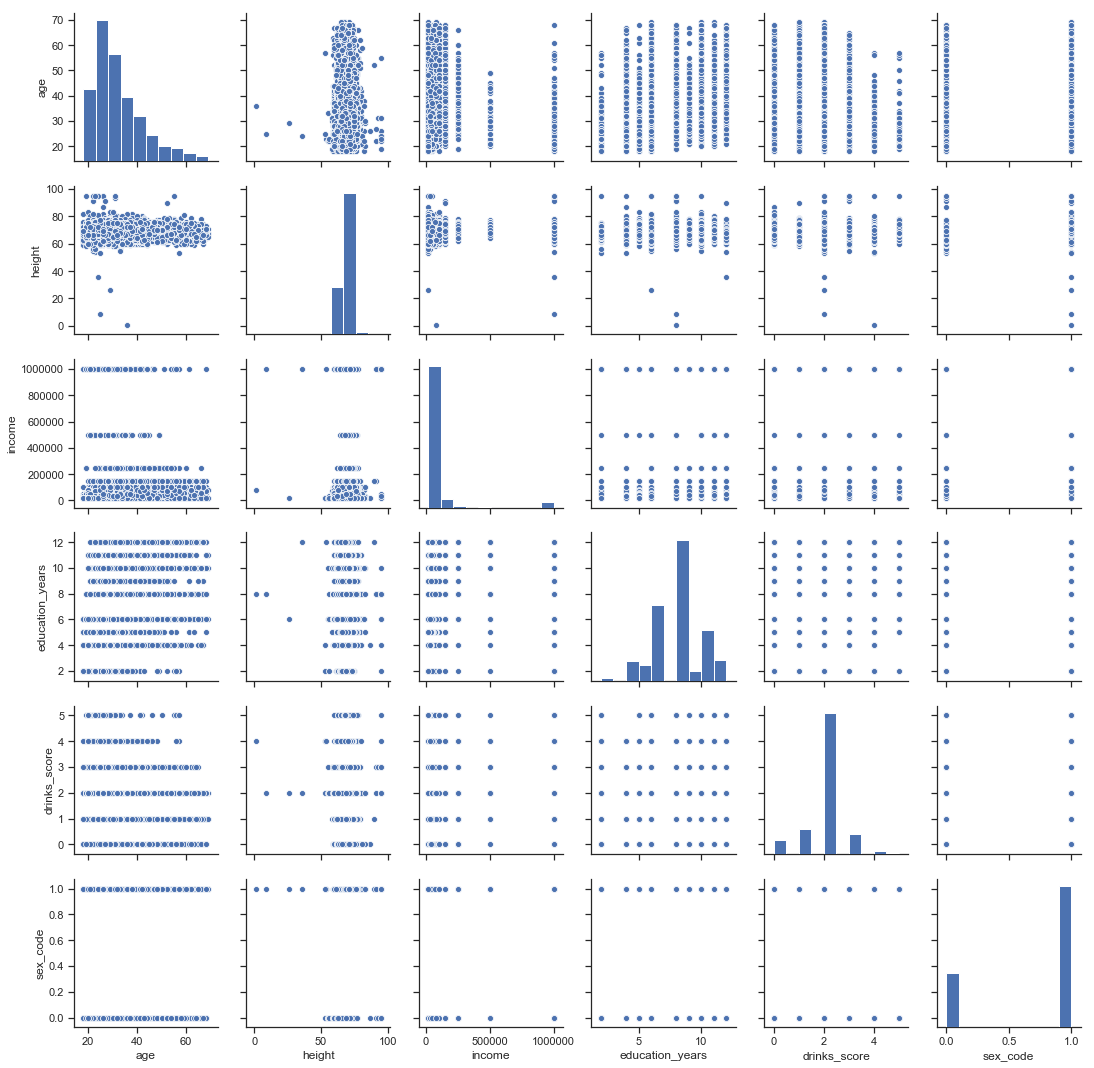

In [58]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
#df_sns = sns.load_dataset("df_mlr")
#sns.pairplot(df_sns)
sns.pairplot(df_mlr)

/Users/michaelctodd/miniconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


        age    height  sex_code  education_years  drinks_score
0  0.098039  0.744681       1.0              0.4           0.4
1  0.196078  0.755319       1.0              0.6           0.4
2  0.235294  0.691489       0.0              0.2           0.4
3  0.215686  0.648936       0.0              0.4           0.4
4  0.431373  0.744681       1.0              0.6           0.4
44982829440.40756
r2 score: 
-0.36371945567275255
-0.36371945567275255


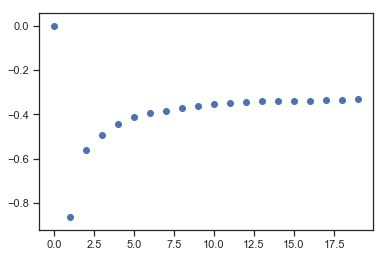

In [104]:
#regression approach 2
from sklearn.neighbors import KNeighborsRegressor

df_knnr = df[['age','height','income','education_years','drinks_score', 'sex_code']]
df_knnr = df_knnr.dropna()

x = df_knnr[['age','height','sex_code','education_years','drinks_score']] #-37
#x = df_knnr[['age','height','education_years','drinks_score']] # -34.3
#x = df_knnr[['age','sex_code','education_years','drinks_score']] # -21.8
#x = df_knnr[['height','sex_code','education_years','drinks_score']] # 21.1
#x = df_knnr[['age','height','sex_code','education_years']] # -32.1
#x = df_knnr[['age','height','sex_code', 'drinks_score']] # -39.6
#x = df_knnr[['height','education_years','sex_code']] # -12.5
#x = df_knnr[[ 'education_years']] # -9.7

#normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=x.columns)

print(feature_data.head())
y = df_knnr.income

x_train, x_test, y_train, y_test = train_test_split(feature_data, y, train_size = 0.8, test_size = 0.2, random_state=3)

regressor = KNeighborsRegressor(n_neighbors=9,weights='distance')
regressor.fit(x_train,y_train)

print(mean_squared_error(regressor.predict(x_test),y_test))
print('r2 score: ')
print(r2_score(y_test, regressor.predict(x_test)))
print(regressor.score(x_test,y_test))
#plt.scatter(y_test, y_predict)

r2 = [0 for i in range(20)]
mse = [0 for i in range(20)]
for i in range(1,20):
    regressor = KNeighborsRegressor(n_neighbors = i, weights='distance')
    regressor.fit(x_train, y_train)

    r2[i] = r2_score(y_test, regressor.predict(x_test))
    mse[i] = mean_squared_error(regressor.predict(x_test),y_test)

plt.scatter(range(20),r2)
plt.show()


### an overall conclusion, with a preliminary answer to your initial question(s), next steps, and what other data you would like to have in order to better answer your question(s)